## Midterm: MongoDB Notebooks

## Evelyn Lee
## May 20 ,2022
## a question about movie intended to answer
## datasets: imdb

## Introduciton:
The Internet Movie Database (IMDb) is a website that serves as an online database of world cinema. This website contains a large number of public data on films such as the title of the film, the year of release of the film, the genre of the film, the audience, the rating of critics, the duration of the film, the summary of the film, actors, directors and much more. Faced with the large amount of data available on this site, I thought that it would be interesting to analyze the movies data on the IMDb website between the year 2000 and the year 2017.

Read MongoDB connection string from a credentials file

In [1]:
import json

# read mongo DB connection string from json file
with open('credentials.json') as f:
    data=json.load(f)
    mongo_conn_str = data['mongodb']

reads data from MongoDB into memory

In [2]:
import pymongo

# connect to the movie database and verify it's working
client = pymongo.MongoClient(mongo_conn_str)
db = client.movies
serverStatusResult=db.command('serverStatus')
print(serverStatusResult)

{'host': 'cluster0-shard-00-02.ihwih.mongodb.net:27017', 'version': '5.0.8', 'process': 'mongod', 'pid': 109132, 'uptime': 305032.0, 'uptimeMillis': 305031706, 'uptimeEstimate': 305031, 'localTime': datetime.datetime(2022, 5, 20, 6, 2, 57, 389000), 'asserts': {'regular': 0, 'warning': 0, 'msg': 0, 'user': 0, 'rollovers': 0}, 'connections': {'current': 15, 'available': 485, 'totalCreated': 156}, 'extra_info': {'note': 'fields vary by platform', 'page_faults': 0}, 'network': {'bytesIn': 8544168, 'bytesOut': 137636939, 'numRequests': 7787}, 'opcounters': {'insert': 23, 'query': 88, 'update': 0, 'delete': 0, 'getmore': 24, 'command': 7647, 'deprecated': {'query': 0, 'getmore': 0}}, 'opcountersRepl': {'insert': 0, 'query': 0, 'update': 0, 'delete': 0, 'getmore': 0, 'command': 0, 'deprecated': {'query': 0, 'getmore': 0}}, 'repl': {'topologyVersion': {'processId': ObjectId('628287892bdf0069896337ff'), 'counter': 6}, 'hosts': ['cluster0-shard-00-00.ihwih.mongodb.net:27017', 'cluster0-shard-00-

## Execute query on the movie data and print the results in DataFrame.

In [3]:
import pandas as pd

cursor_imdb = db['imdb'].find() 

# expand the cursor and add to the DataFrame
imdb = pd.DataFrame(list(cursor_imdb))
imdb = imdb.drop('_id', 1)
imdb.index += 1

In [4]:
imdb.head()


,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Producer5,Company1,Company2,Company3,Director2,Company4,Company5,Director3,Director4,Director5
1,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,160.0,...,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN,NaN,NaN,NaN,NaN
2,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,356.0,...,Jon Favreau,Marvel Studios,NaN,NaN,Joe Russo,NaN,NaN,NaN,NaN,NaN
3,6565702,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019,6,5,200.0,...,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,NaN,Kinberg Genre,Marvel Entertainment,NaN,NaN,NaN
4,468569,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),2008,7,14,185.0,...,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,NaN,DC Comics,NaN,NaN,NaN,NaN
5,1477834,Aquaman,143.0,7.0,300580.0,PG-13,2018,11,26,160.0,...,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,NaN,Rodeo FX,The Safran Company,NaN,NaN,NaN


In [11]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 1 to 484
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              484 non-null    object 
 1   Title           484 non-null    object 
 2   Runtime         448 non-null    float64
 3   Rating          459 non-null    float64
 4   Votes           459 non-null    float64
 5   MPAARating      317 non-null    object 
 6   ReleaseYear     484 non-null    int64  
 7   ReleaseMonth    484 non-null    int64  
 8   ReleaseDay      484 non-null    int64  
 9   Budget          284 non-null    float64
 10  OpeningWeekend  167 non-null    float64
 11  GrossSales      150 non-null    float64
 12  Genres          484 non-null    object 
 13  Cast1           484 non-null    object 
 14  Cast2           484 non-null    object 
 15  Cast3           476 non-null    object 
 16  Cast4           472 non-null    object 
 17  Cast5           467 non-null    obj

In [12]:
imdb.describe()

,Runtime,Rating,Votes,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,OpeningWeekend,GrossSales
count,448.000000,459.000000,4.590000e+02,484.000000,484.000000,484.000000,284.000000,167.000000,150.000000
mean,102.053571,5.925926,1.104748e+05,2005.214876,6.626033,15.828512,99.746479,64.946108,279.766667
std,25.958007,1.476631,2.292722e+05,10.896051,3.345932,8.853859,136.088567,101.303746,260.199882
min,30.000000,1.100000,5.000000e+00,1978.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,87.000000,5.000000,1.220000e+02,1997.000000,4.000000,8.000000,15.000000,11.000000,65.000000
50%,98.000000,6.200000,3.398000e+03,2008.000000,7.000000,16.000000,51.000000,35.000000,188.000000
75%,114.250000,7.000000,9.330200e+04,2014.000000,10.000000,24.000000,142.250000,73.500000,423.750000
max,275.000000,9.000000,2.105721e+06,2019.000000,12.000000,31.000000,990.000000,870.000000,890.000000


<AxesSubplot:>

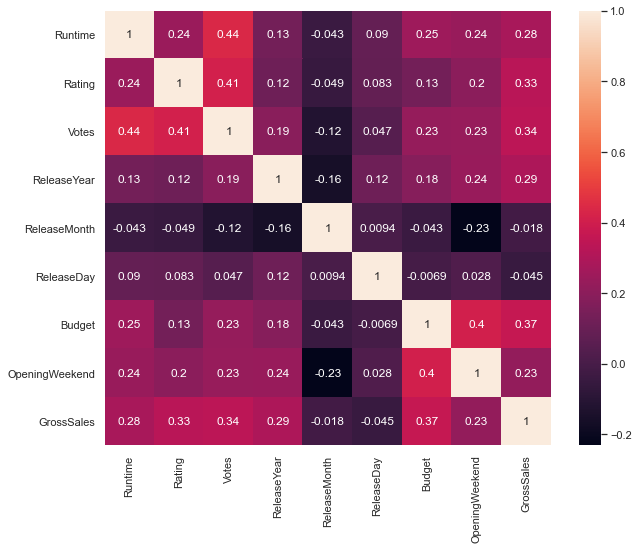

In [13]:
sns.heatmap(imdb.corr(), annot=True)

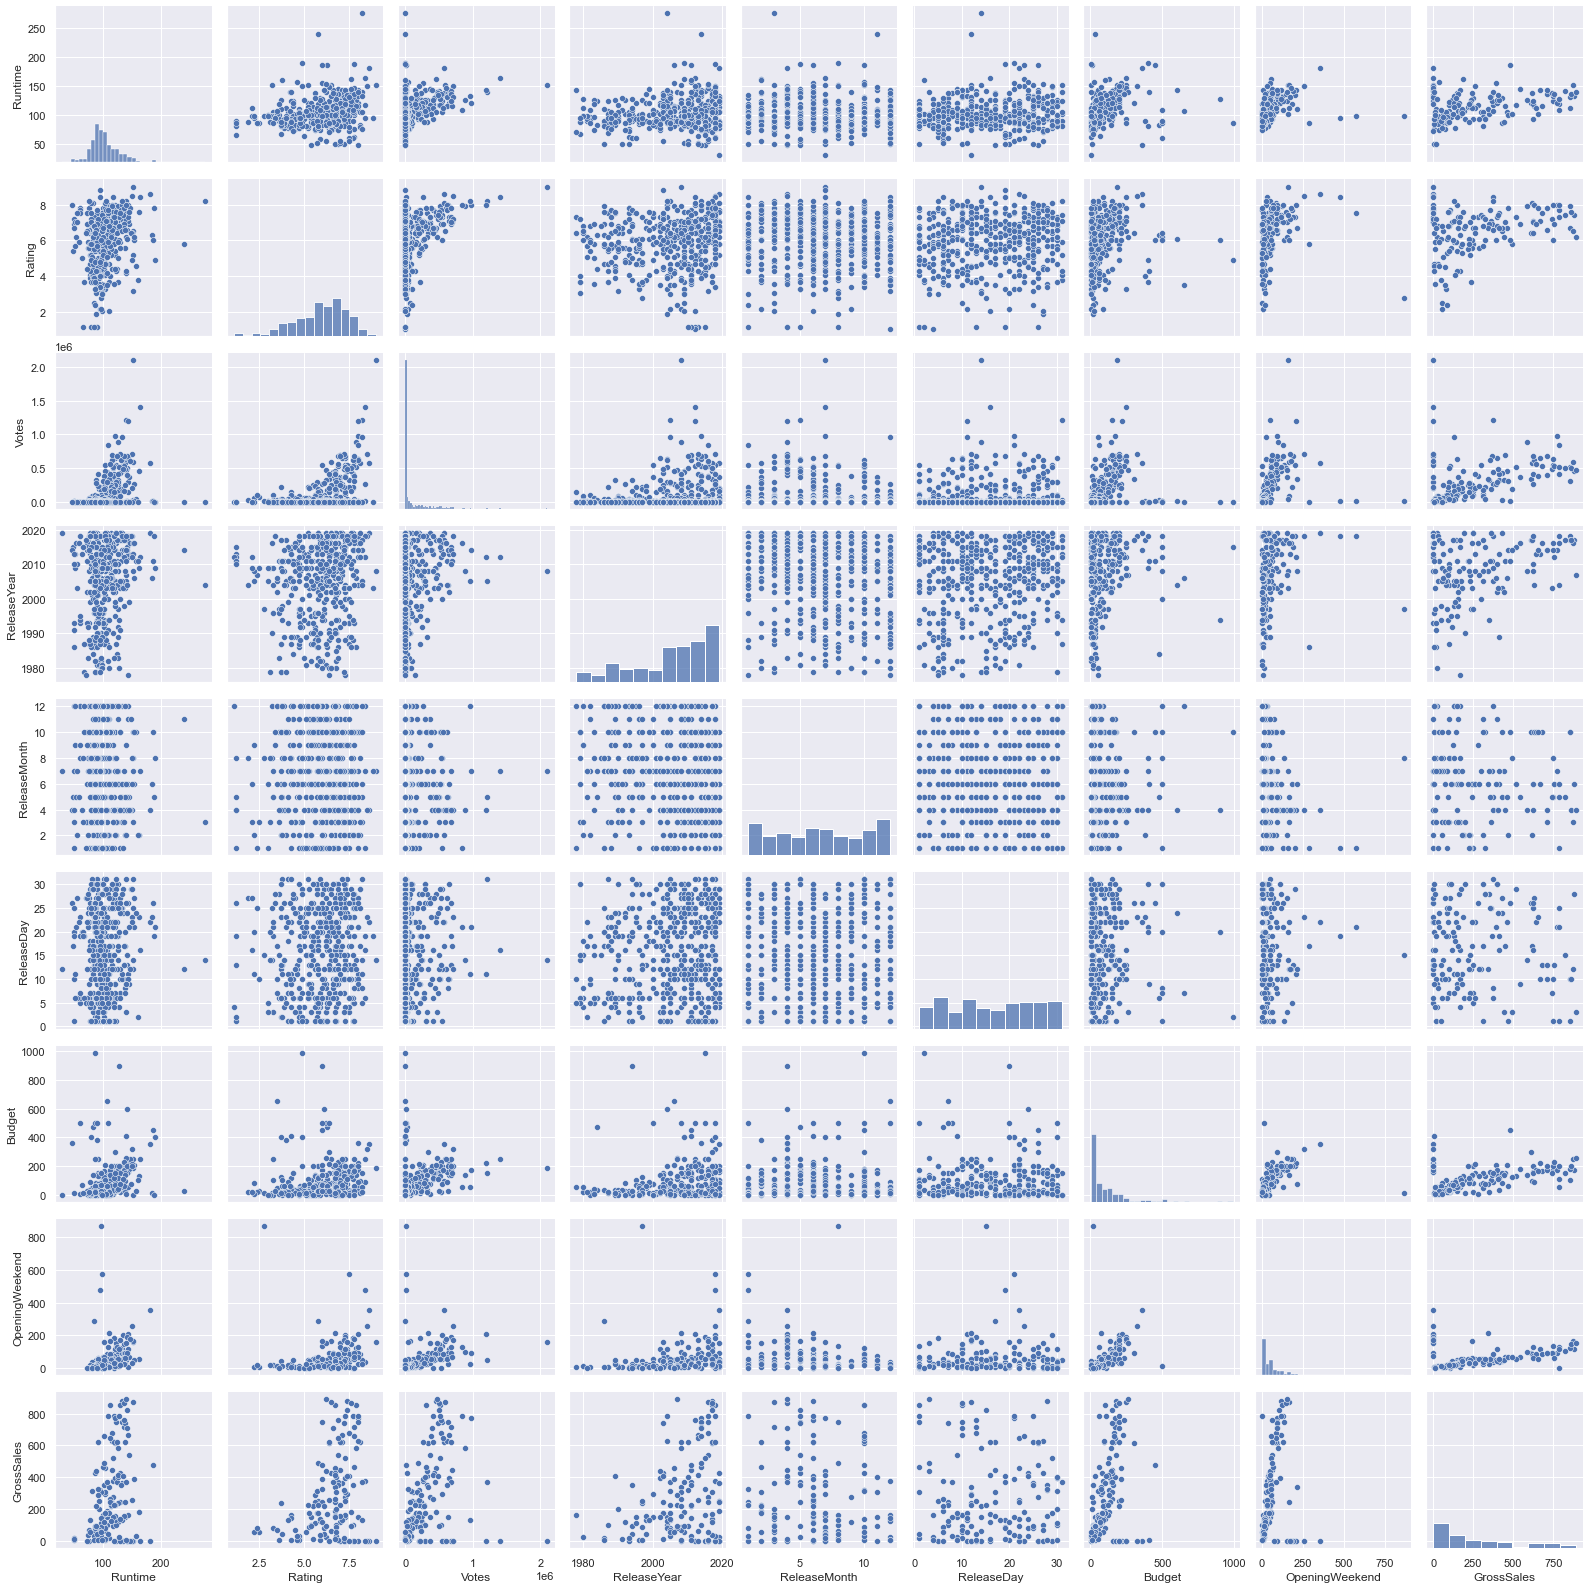

In [15]:
sns.pairplot(imdb)

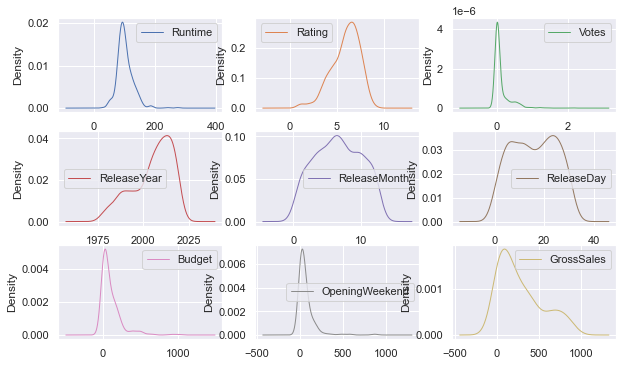

In [26]:
imdb.plot(linewidth=1, kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

# How many movies were released each year?

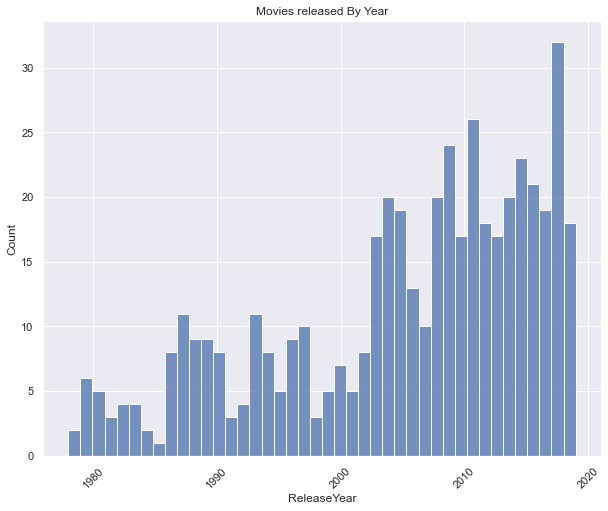

In [5]:
# import matplotlib to create charts
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# using seaborn
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})

plt.title('Movies released By Year')
sns.histplot(data=imdb, x='ReleaseYear', bins=42)
plt.xticks(rotation=45)
plt.show()

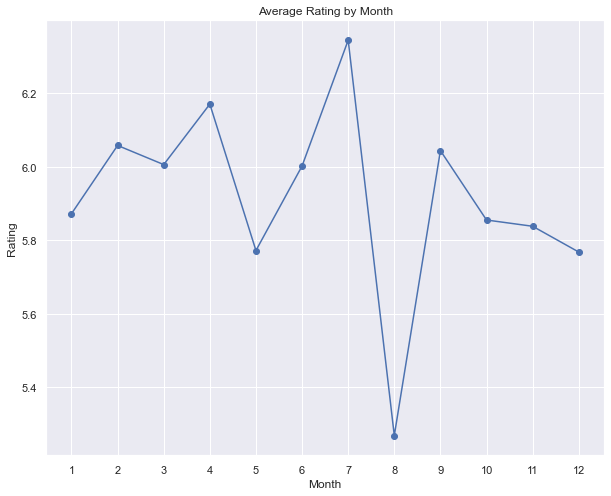

In [6]:
# The plot shows average movie rating by month

# group movies by month and find the ratings
ratings = imdb.groupby('ReleaseMonth').agg({'Rating':'mean'})
plt.title('Average Rating by Month')
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Rating')

# Prevent years convert to decimals
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.plot(ratings, '-o')
plt.show()

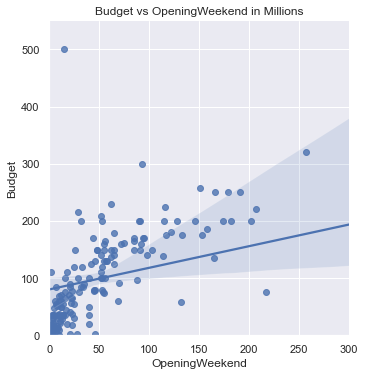

In [7]:
# lineplot using seaborn to find relationship between opening weekend and budget

sns.lmplot(x='OpeningWeekend', y='Budget', data=imdb)
plt.title('Budget vs OpeningWeekend in Millions')
plt.xlim(0,300)
plt.ylim(0,550)
plt.show()

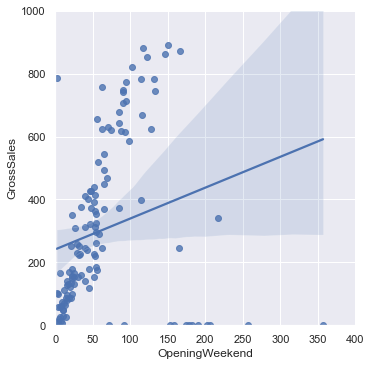

In [8]:
# create lineplot using seaborn to find relationship between opening weekend and gross sales
sns.lmplot(x='OpeningWeekend', y='GrossSales', data=imdb)
plt.xlim(0,400)
plt.ylim(0,1000)
plt.show()

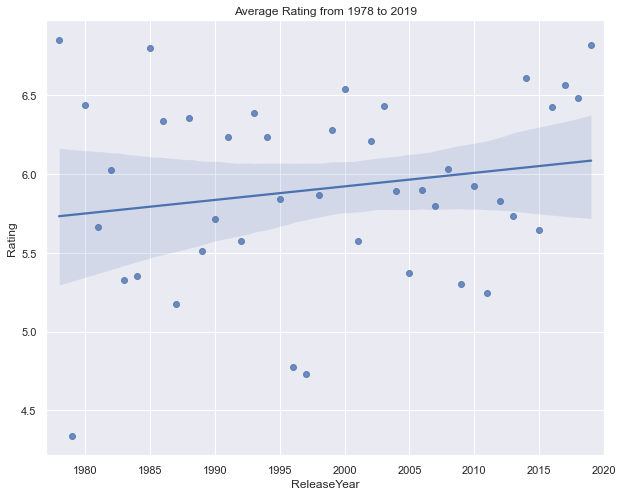

In [9]:
# rating average for each year
avg_rating = imdb.groupby('ReleaseYear').agg({'Rating':'mean'})
g = sns.regplot(x=avg_rating.index, y='Rating', data=avg_rating)
plt.title('Average Rating from 1978 to 2019')
g.set(xlim=(1977, 2020))
plt.show()


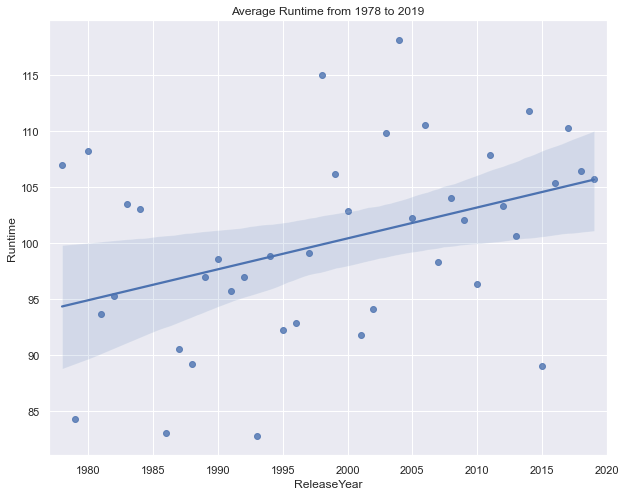

In [10]:
# Runtime average for each year
avg_runtime = imdb.groupby('ReleaseYear').agg({'Runtime':'mean'})
g = sns.regplot(x=avg_runtime.index, y='Runtime', data=avg_runtime)
plt.title('Average Runtime from 1978 to 2019')
g.set(xlim=(1977, 2020))
plt.show()




<AxesSubplot:xlabel='Rating', ylabel='GrossSales'>

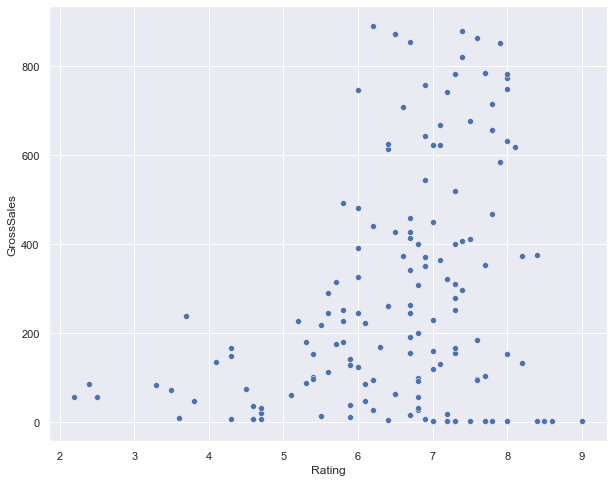

In [25]:
# ratings vs gross sales
sns.scatterplot(x='Rating', y='GrossSales', data=imdb)

<AxesSubplot:xlabel='Rating', ylabel='Budget'>

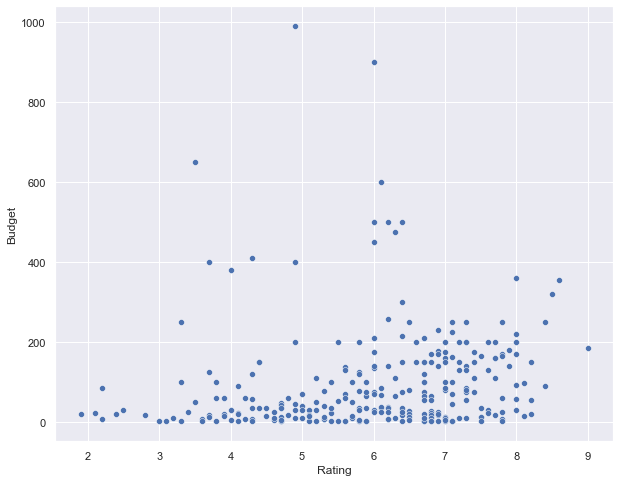

In [24]:
# rating vs budget
sns.scatterplot(x='Rating', y='Budget', data=imdb)

<AxesSubplot:xlabel='Rating', ylabel='Votes'>

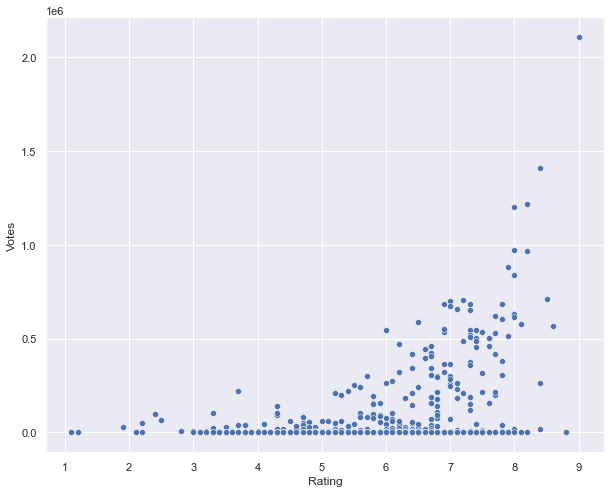

In [23]:
# Rating vs vote
sns.scatterplot(x='Rating', y='Votes', data=imdb)

<AxesSubplot:xlabel='Runtime', ylabel='GrossSales'>

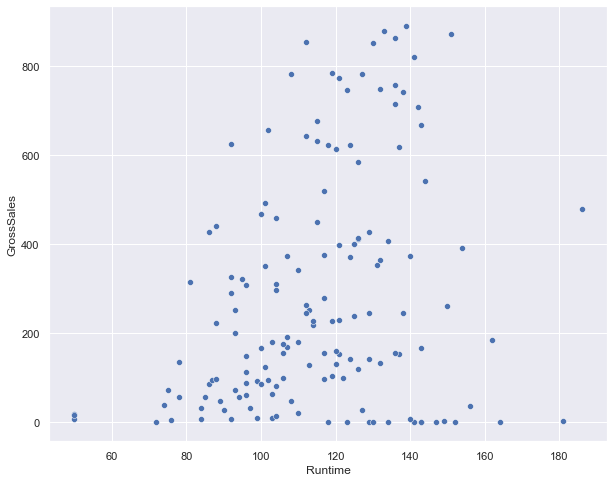

In [22]:
# runtime vs gross sales
sns.scatterplot(x='Runtime', y='GrossSales', data=imdb)

## Conclusions
Movies between 60 minutes and 150 minutes (2h30) make the most money
Movies that exceed 3 hours bring in the least money